In [1]:
import networkx as nx

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [3]:
with open('Gerald.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [4]:
SYMBS = "1234567890,—[]↑№!\"\'«»?.,;:|/\+*{}<>@#$%-^& )("

In [5]:
def clean(text):
    words = []
    text = text.strip().lower().split()
    for word in text:
        if word:
            words.append(word.strip(SYMBS))
    return words

In [6]:
words = clean(text)
for i in words:
    if i == '':
        words.remove(i)

In [7]:
print(words[:20])

['ведьмак', 'последнее', 'желание', 'анджей', 'сапковский', 'ведьмак', 'книгой', 'последнее', 'желание', 'начинается', 'один', 'из', 'лучших', 'циклов', 'в', 'истории', 'жанра', 'фэнтези', 'семь', 'новелл']


In [8]:
import pymorphy2

In [9]:
morph = pymorphy2.MorphAnalyzer()

In [10]:
tagged = []
real_nouns = []
for word in words:
    p = morph.parse(word)[0]
    if 'NOUN' in p.tag:
        tagged.append(p.normal_form)
        real_nouns.append(word)

In [11]:
set_noun = set(tagged)

In [12]:
G = nx.Graph()

In [13]:
#G.add_nodes_from(set_noun, label=set_noun)

In [14]:
weights = {}

In [15]:
for i in range(len(words)):
    if words[i] in real_nouns:
        try:
            if words[i+1] in real_nouns:
                edge = tuple([morph.parse(words[i])[0].normal_form, morph.parse(words[i+1])[0].normal_form])
                if not edge in weights:
                    weights[edge] = 1
                else:
                    weights[edge] +=1
        except IndexError:
            continue
            #G.add_edge(morph.parse(words[i])[0].normal_form, morph.parse(words[i+1])[0].normal_form)
        try:
            if words[i+2] in real_nouns:
                edge = tuple([morph.parse(words[i])[0].normal_form, morph.parse(words[i+2])[0].normal_form])
                if not edge in weights:
                    weights[edge] = 1
                else:
                    weights[edge] +=1
        except IndexError:
            continue
            #G.add_edge(morph.parse(words[i])[0].normal_form, morph.parse(words[i+2])[0].normal_form)
        try:
            if words[i+3] in real_nouns:
                edge = tuple([morph.parse(words[i])[0].normal_form, morph.parse(words[i+3])[0].normal_form])
                if not edge in weights:
                    weights[edge] = 1
                else:
                    weights[edge] +=1
        except IndexError:
            continue
            #G.add_edge(morph.parse(words[i])[0].normal_form, morph.parse(words[i+3])[0].normal_form)
        try:
            if words[i+4] in real_nouns:
                edge = tuple([morph.parse(words[i])[0].normal_form, morph.parse(words[i+4])[0].normal_form])
                if not edge in weights:
                    weights[edge] = 1
                else:
                    weights[edge] += 1
        except IndexError:
            continue
            #G.add_edge(morph.parse(words[i])[0].normal_form, morph.parse(words[i+4])[0].normal_form)
        

In [21]:
for edge, w in weights.items():
    if w > 2:
        G.add_edge(edge[0], edge[1], weight=w)

In [98]:
nx.write_gexf(G, 'graph_Dubrovskiy.gexf')

In [22]:
# scale - во сколько раз увеличить дефолтное расстояние между узлами
# iterations — сколько итераций проходит алгоритм укладки (чем больше, тем сильнее "расползется" граф)
pos=nx.spring_layout(G,scale=3, iterations=20)

In [23]:
G.edges()

EdgeView([('ведьмак', 'геральт'), ('ведьмак', 'велерада'), ('ведьмак', 'глаз'), ('ведьмак', 'желание'), ('ведьмак', 'человек'), ('ведьмак', 'фольтест'), ('ведьмак', 'лицо'), ('ведьмак', 'господин'), ('ведьмак', 'шея'), ('ведьмак', 'движение'), ('ведьмак', 'нивеллена'), ('ведьмак', 'губа'), ('геральт', 'голова'), ('геральт', 'упырица'), ('геральт', 'меч'), ('геральт', 'глаз'), ('геральт', 'нивеллена'), ('геральт', 'геральт'), ('геральт', 'рука'), ('геральт', 'клык'), ('геральт', 'морда'), ('меч', 'ножны'), ('меч', 'рука'), ('меч', 'рукоять'), ('меч', 'спина'), ('рука', 'голова'), ('рука', 'знак'), ('тысяча', 'орен'), ('третье', 'петух'), ('упырица', 'человек'), ('упырица', 'склеп'), ('вход', 'склеп'), ('храм', 'мелитэль'), ('мелитэль', 'культ'), ('крупица', 'истина'), ('чёрный', 'плащ'), ('спина', 'дельфин'), ('ремень', 'грудь'), ('спинка', 'стул'), ('время', 'время'), ('оружейник', 'женщина'), ('куст', 'роза'), ('чудище', 'лапа'), ('бел', 'платье'), ('конец', 'жердь')])

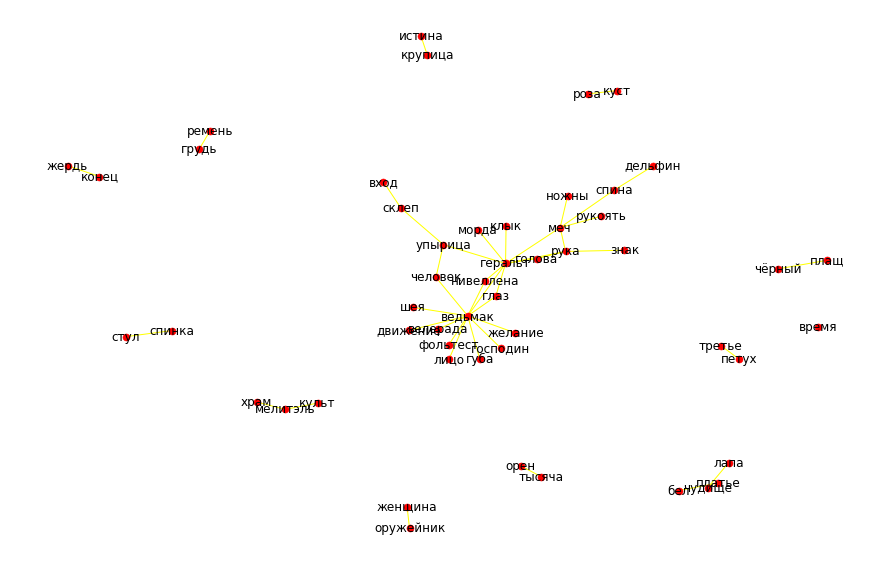

In [24]:
plt.figure(figsize=(15,10))
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=50) # рисуем узлы красным цветом, задаём размер узла
nx.draw_networkx_edges(G, pos, edge_color='yellow') # рисуем рёбра жёлтым
nx.draw_networkx_labels(G, pos)
plt.axis('off') # по умолчанию график будет снабжён осями с координатами, здесь они бессмысленны, так что отключаем
plt.show() # что получилось?

In [19]:
# Центральность узлов

deg = nx.degree_centrality(G)
for nodeid in sorted(deg, key=deg.get, reverse=True):
    print(nodeid)

In [20]:
# Коэффициент ассортативности (насколько вся сеть завязана на основных "хабах"):
print('Коэффициент ассортативности: {}'.format(nx.degree_pearson_correlation_coefficient(G)))

# Плотность графа, отношение рёбер и узлов
print('Плотность графа: {}'.format(nx.density(G)))

кирил
пётр
андрей
год
троекур
день
генерал-аншеф
сын
душа
князь
троекуров
имение
батюшка
исправник
барин
время
гость
владение
суд
петров
владимир
имя
друг
двор
письмо
сельцо
удовольствие
гвардия
поручик
земля
угодье
спицын
отец
человек
маша
дверь
слово
голос
гаврило
часы
утро
хозяин
бумага
кистеневка
неудовольствие
мужеска
прошение
август
канцелярист
смерть
советник
соболев
молодая
приезд
гром
победа
учитель
марья
карман
пистолет
объяснение
марь
дама
антон
пафнутьй
господин
тарас
алексей
превосходительство
смотритель
слуга
зал
комната
верейский
слава
бог
амфитрион
царь
жена
кольцо
дупло
рыжий
мальчик
солдат
леса
Коэффициент ассортативности: -0.21367071682931277
Плотность графа: 0.02857142857142857
